## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, auc , roc_curve,precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [6]:
import scipy.stats as stats
# importing libraries
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,LancasterStemmer
from contractions import fix
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas
from tqdm import tqdm
tqdm.pandas()
from wordcloud import WordCloud
from gensim.models import Word2Vec,doc2vec
import nltk

## Data Collection

In [7]:
df = pd.read_csv("fake_news.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df.dropna(subset="text",inplace=True)

In [10]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [10]:
data = df[['text','label']]
data

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [12]:
data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

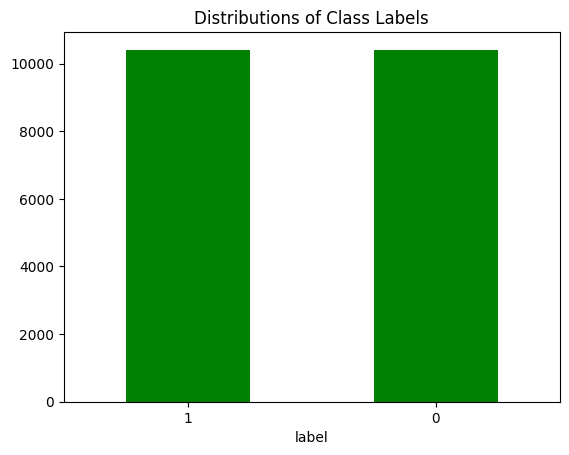

In [13]:
data['label'].value_counts().plot(kind='bar',color='green')
plt.title("Distributions of Class Labels")
plt.xticks(rotation=1)
plt.show()

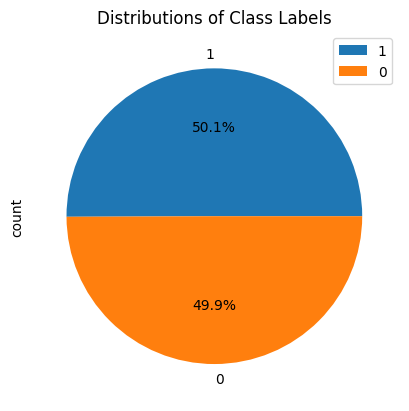

In [14]:
data['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Distributions of Class Labels")
plt.legend()
plt.show()

In [15]:
data.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


## Data Preprocessing

In [24]:
## Data Split For Train and Test 

x_train , x_test , y_train , y_test = train_test_split(data['text'], data['label'] , test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16640,)
(4160,)
(16640,)
(4160,)


In [25]:
x_train

2703     Rep. Luis Gutierrez ( ) whined about Breitbart...
12440    WASHINGTON  —   Early in 2011, after a hectic ...
13839    The United States Attorney’s Office Southern D...
2219     Islamist militants from the Boko Haram terror ...
522      Here are the top 10 comments of the week on ou...
                               ...                        
14992      Hollywood talent agency   (William Morris En...
2960     Donald Trump’s   immigration reform is getting...
20679    SNOWFLAKE: Colbert Didn’t Want To Write Jokes ...
16641    In rhetoric, there’s an ancient concept called...
13499    I repeated it to myself as if it were a mantra...
Name: text, Length: 16640, dtype: object

In [26]:
y_train

2703     0
12440    0
13839    0
2219     0
522      0
        ..
14992    0
2960     0
20679    1
16641    0
13499    0
Name: label, Length: 16640, dtype: int64

In [29]:
## We build some function for data cleaning and find insights from it
def remove_blank(data):
    if pd.isnull(data):  # Check if data is NaN
        return ""  # Return an empty string for missing values
    formated_text = str(data).replace("\\n", " ").replace("\t", " ")
    return formated_text

def expand_text(data):
    fixed=fix(data)
    return fixed

def handle_accented(data):
    fixed_text=unidecode(data)
    return fixed_text


stopword_list=stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_text(data):
    tokens=word_tokenize(data)
    text=[i.lower() for i in tokens if (i.lower() not in punctuation) and (i.lower() not in stopword_list) and (len(i)>2) and (i.isalpha())]
    return text

def lemmatization(data):
    lemma=WordNetLemmatizer()
    final_text=[]
    for i in data:
        lemma_word=lemma.lemmatize(i)
        final_text.append(lemma_word)
    return " ".join(final_text)

In [30]:
clean_train=x_train.apply(remove_blank)
clean_test=x_test.apply(remove_blank)

#clean_train=clean_train.apply(expand_text)
#clean_test=clean_test.apply(expand_text)

clean_train=clean_train.apply(handle_accented)
clean_test=clean_test.apply(handle_accented)

clean_train=clean_train.apply(clean_text)
clean_test=clean_test.apply(clean_text)

clean_train=clean_train.apply(lemmatization)
clean_test=clean_test.apply(lemmatization)

In [31]:
clean_train

2703     luis gutierrez whined breitbart news coverage ...
12440    washington early hectic visit yemen secretary ...
13839    united state attorney office southern district...
2219     islamist militant boko haram terror group kill...
522      top comment week digital platform selected rea...
                               ...                        
14992    hollywood talent agency william morris endeavo...
2960     donald trump immigration reform getting strong...
20679    snowflake colbert want write joke trump winnin...
16641    rhetoric ancient concept called argument latin...
13499    repeated mantra stay left stay left thought co...
Name: text, Length: 16640, dtype: object

In [32]:
clean_test

674      news line afp headline tracking episode news l...
9887     thursday november maria sharapova returning wh...
20620    first time david letterman mom dorothy mengeri...
18039    home change fight racism oregon college devote...
3232     pope francis put forward case woman would sacr...
                               ...                        
17791    donate city protect people threatened trumpism...
20124    new diversity officer collect per year derek d...
15610    three quarter american oppose gun control reco...
18573    wikileaks bill clinton boast hillary relations...
3649     montag november chaos bei jochen schweizer bes...
Name: text, Length: 4160, dtype: object

## WordCloud

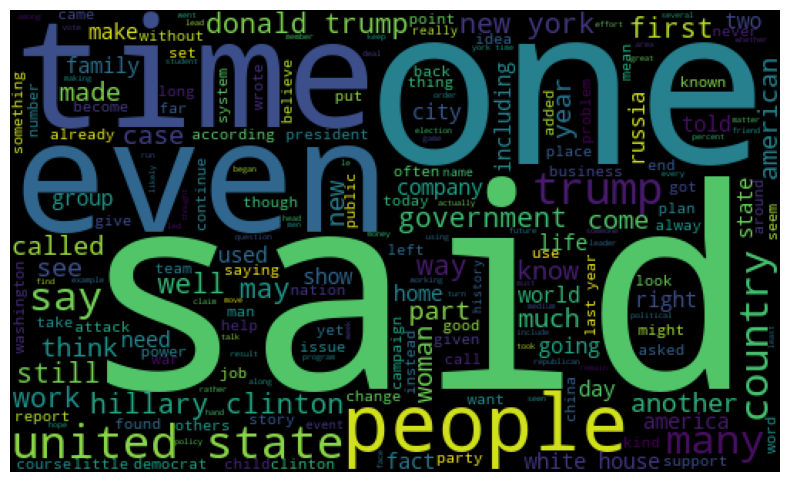

In [33]:
# wordcloud for train data
str_text=clean_train.str.cat(sep=" ")    # we have to convert all review into single string
wordcloud=WordCloud(width=500,height=300).generate(str_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

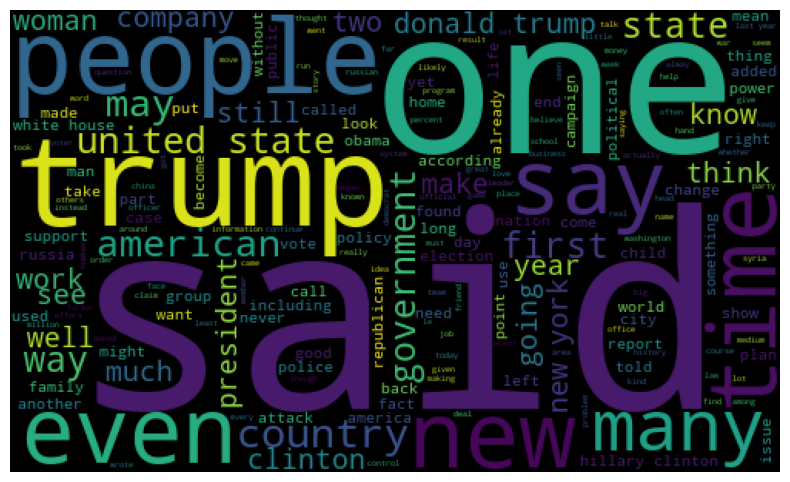

In [34]:
# wordcloud  for test data
str_text=clean_test.str.cat(sep=" ")    # we have to convert all review into single string
wordcloud=WordCloud(width=500,height=300).generate(str_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Convert target column into categorical 

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
num_class = 2     ## Fake News Classifier Contains only two class >> Real - 1 , Fake - 0 
y_train.value_counts()

label
1    8321
0    8319
Name: count, dtype: int64

In [53]:
num_class = 2
y_train_c = to_categorical(y_train , num_classes=num_class)
y_test_c = to_categorical(y_test , num_classes=num_class)

In [54]:
y_train_c

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [55]:
x_train_list = clean_train.to_list()
x_test_list = clean_test.to_list()
max_words=5000
tk = Tokenizer(num_words=max_words,oov_token="##oov##")
tk.fit_on_texts(x_train_list)
x_train_seq = tk.texts_to_sequences(x_train_list)
x_test_seq = tk.texts_to_sequences(x_test_list)

In [56]:
len(x_train_seq)

16640

In [57]:
vocab_size = len(tk.word_index) + 1
vocab_size

137226

In [58]:
lst=[]
for i in range(0,len(x_train_seq)):
    a = len(x_train_seq[i])
    lst.append(a)

print("Max len of sent:",max(lst))

Max len of sent: 15313


In [59]:
max_len_per_sent = 1000
x_train_seq = pad_sequences(x_train_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")
x_test_seq = pad_sequences(x_test_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")

In [60]:
x_train_seq

array([[   1,    1,    1, ...,    0,    0,    0],
       [ 113,  282,    1, ...,    0,    0,    0],
       [  28,    7,  469, ...,    0,    0,    0],
       ...,
       [   1,    1,   46, ...,    0,    0,    0],
       [2245, 2113, 2344, ...,    0,    0,    0],
       [2442,    1,  731, ...,    0,    0,    0]])

In [61]:
x_test_seq

array([[  32,  241, 4694, ...,    0,    0,    0],
       [ 370,  287, 4454, ...,    0,    0,    0],
       [  23,   10,  589, ...,    0,    0,    0],
       ...,
       [ 117, 1761,   16, ...,    0,    0,    0],
       [ 725,  144,   12, ...,    0,    0,    0],
       [   1,  287, 1985, ...,    0,    0,    0]])

In [62]:
print(x_train_seq.shape)
print(x_test_seq.shape)

(16640, 1000)
(4160, 1000)


In [63]:
vocab_size

137226

In [64]:
y_train

2703     0
12440    0
13839    0
2219     0
522      0
        ..
14992    0
2960     0
20679    1
16641    0
13499    0
Name: label, Length: 16640, dtype: int64